In [1]:
import torch
from torch import utils
from torchvision import datasets, transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot_mnist(images, shape):
    fig = plt.figure(figsize=shape[::-1], dpi=80)
    for j in range(1, len(images) + 1):
        ax = fig.add_subplot(shape[0], shape[1], j)
        ax.matshow(images[j - 1][0], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

In [3]:
path='./MNIST_data'

#### Получаем сырые данные - объекты PIL Image с диапазоном значений [0, 255]

In [4]:
PIL_data = datasets.MNIST(path, train=True, download=True, transform=transforms.ToTensor()).data

#### Вычисляем среднее значение и стандартное отклонение по всему набоу сырых данных

In [29]:
train_mean  = PIL_data.type(torch.float32).mean() / 255
train_mean

tensor(0.1307)

In [30]:
train_std = PIL_data.type(torch.float32).std() / 255
train_std

tensor(0.3081)

#### Теперь эти значения можно использоватть для масштабирования набора данных

In [8]:
mnist_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((train_mean,), (train_std,)),
           ])

In [9]:
train_data = datasets.MNIST(path, train=True, download=True, transform=mnist_transform)
test_data = datasets.MNIST(path, train=False, download=True, transform=mnist_transform)

#### Убеждаемся, что среднее значение пикселя по всему __тренировочному__ набору равно 0, а стандартное отклонение равно 1

In [10]:
train_means = [train_data[i][0].mean().item() for i in range(train_data.data.shape[0])]

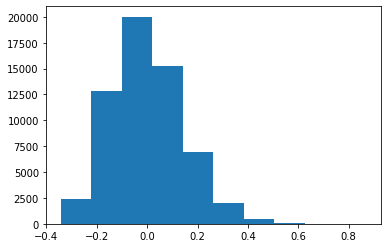

In [11]:
plt.hist(train_means);

In [12]:
np.mean(train_means)

-3.652775683349319e-08

In [13]:
train_stds = [train_data[i][0].std().item() for i in range(train_data.data.shape[0])]

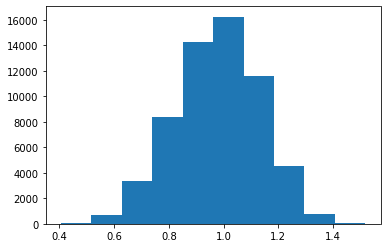

In [14]:
plt.hist(train_stds);

In [15]:
np.mean(train_stds)

0.9785675027489662

#### Убеждаемся, что среднее значение пикселя по всему __тестовому__ набору равно 0, а стандартное отклонение равно 1

In [16]:
test_means = [test_data[i][0].mean().item() for i in range(test_data.data.shape[0])]

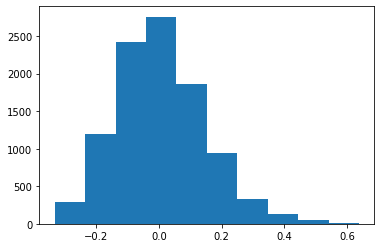

In [17]:
plt.hist(test_means);

In [18]:
np.mean(test_means)

0.006017758842214789

In [19]:
test_stds = [test_data[i][0].std().item() for i in range(test_data.data.shape[0])]

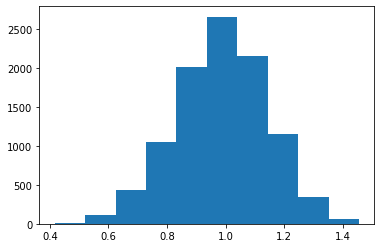

In [20]:
plt.hist(test_stds);

In [21]:
np.mean(test_stds)

0.9861958434581757

In [22]:
images = [train_data[i][0] for i in range(50)]

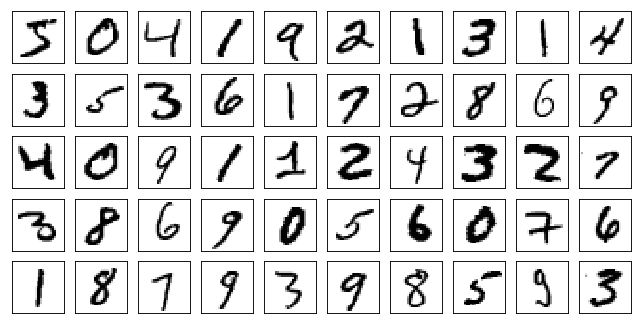

In [23]:
plot_mnist(images, (5, 10))

In [24]:
images[0][0].shape

torch.Size([28, 28])

In [25]:
train_loader = utils.data.DataLoader(train_data, batch_size=50, shuffle=True)

In [26]:
batch_x, batch_y = next(iter(train_loader))

In [27]:
batch_x.shape

torch.Size([50, 1, 28, 28])

In [28]:
batch_y

tensor([7, 8, 7, 4, 1, 9, 6, 6, 2, 8, 5, 3, 9, 3, 0, 3, 1, 0, 7, 8, 3, 6, 0, 8,
        9, 9, 1, 8, 2, 5, 6, 7, 7, 4, 3, 5, 9, 7, 6, 4, 7, 0, 7, 1, 7, 8, 8, 8,
        6, 4])